# Сшивка ГИС

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import lasio
from matplotlib.ticker import MultipleLocator


In [ ]:
las = lasio.read('well 1.las')
df = las.df().reset_index()
df

,DEPT,AK,BK,BK_3,DS,DS_2,DT_1,GGP,GGP_1,GK,GK_3,NNB,NNB_1,PS,PS_3
0,3650.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,186.409
1,3650.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,186.669
2,3650.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,187.159
3,3650.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,187.266
4,3650.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,187.235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5816,4231.6,NaN,19.58,NaN,197.33,NaN,NaN,NaN,NaN,6.630,NaN,9.580,NaN,207.652,NaN
5817,4231.7,NaN,18.74,NaN,197.52,NaN,NaN,NaN,NaN,6.932,NaN,9.451,NaN,207.554,NaN
5818,4231.8,NaN,18.79,NaN,197.64,NaN,NaN,NaN,NaN,7.059,NaN,9.240,NaN,207.476,NaN
5819,4231.9,NaN,18.22,NaN,197.66,NaN,NaN,NaN,NaN,7.031,NaN,8.980,NaN,207.437,NaN


In [31]:
las.curves.keys()

['DEPT',
 'AK',
 'BK',
 'BK_3',
 'DS',
 'DS_2',
 'DT_1',
 'GGP',
 'GGP_1',
 'GK',
 'GK_3',
 'NNB',
 'NNB_1',
 'PS',
 'PS_3']

In [6]:
logs = ['AK', 'BK', 'DS', 'GGP', 'GK', 'NNB', 'PS']
logs_ = ['DT_1', 'BK_3', 'DS_2', 'GGP_1', 'GK_3', 'NNB_1', 'PS_3']

colors = ['red', 'blue', 'yellow', 'green', 'gray', 'purple', 'pink']
colors_ = ['darkred', 'darkblue', 'gold', 'olive', 'darkgray', 'indigo', 'deeppink']

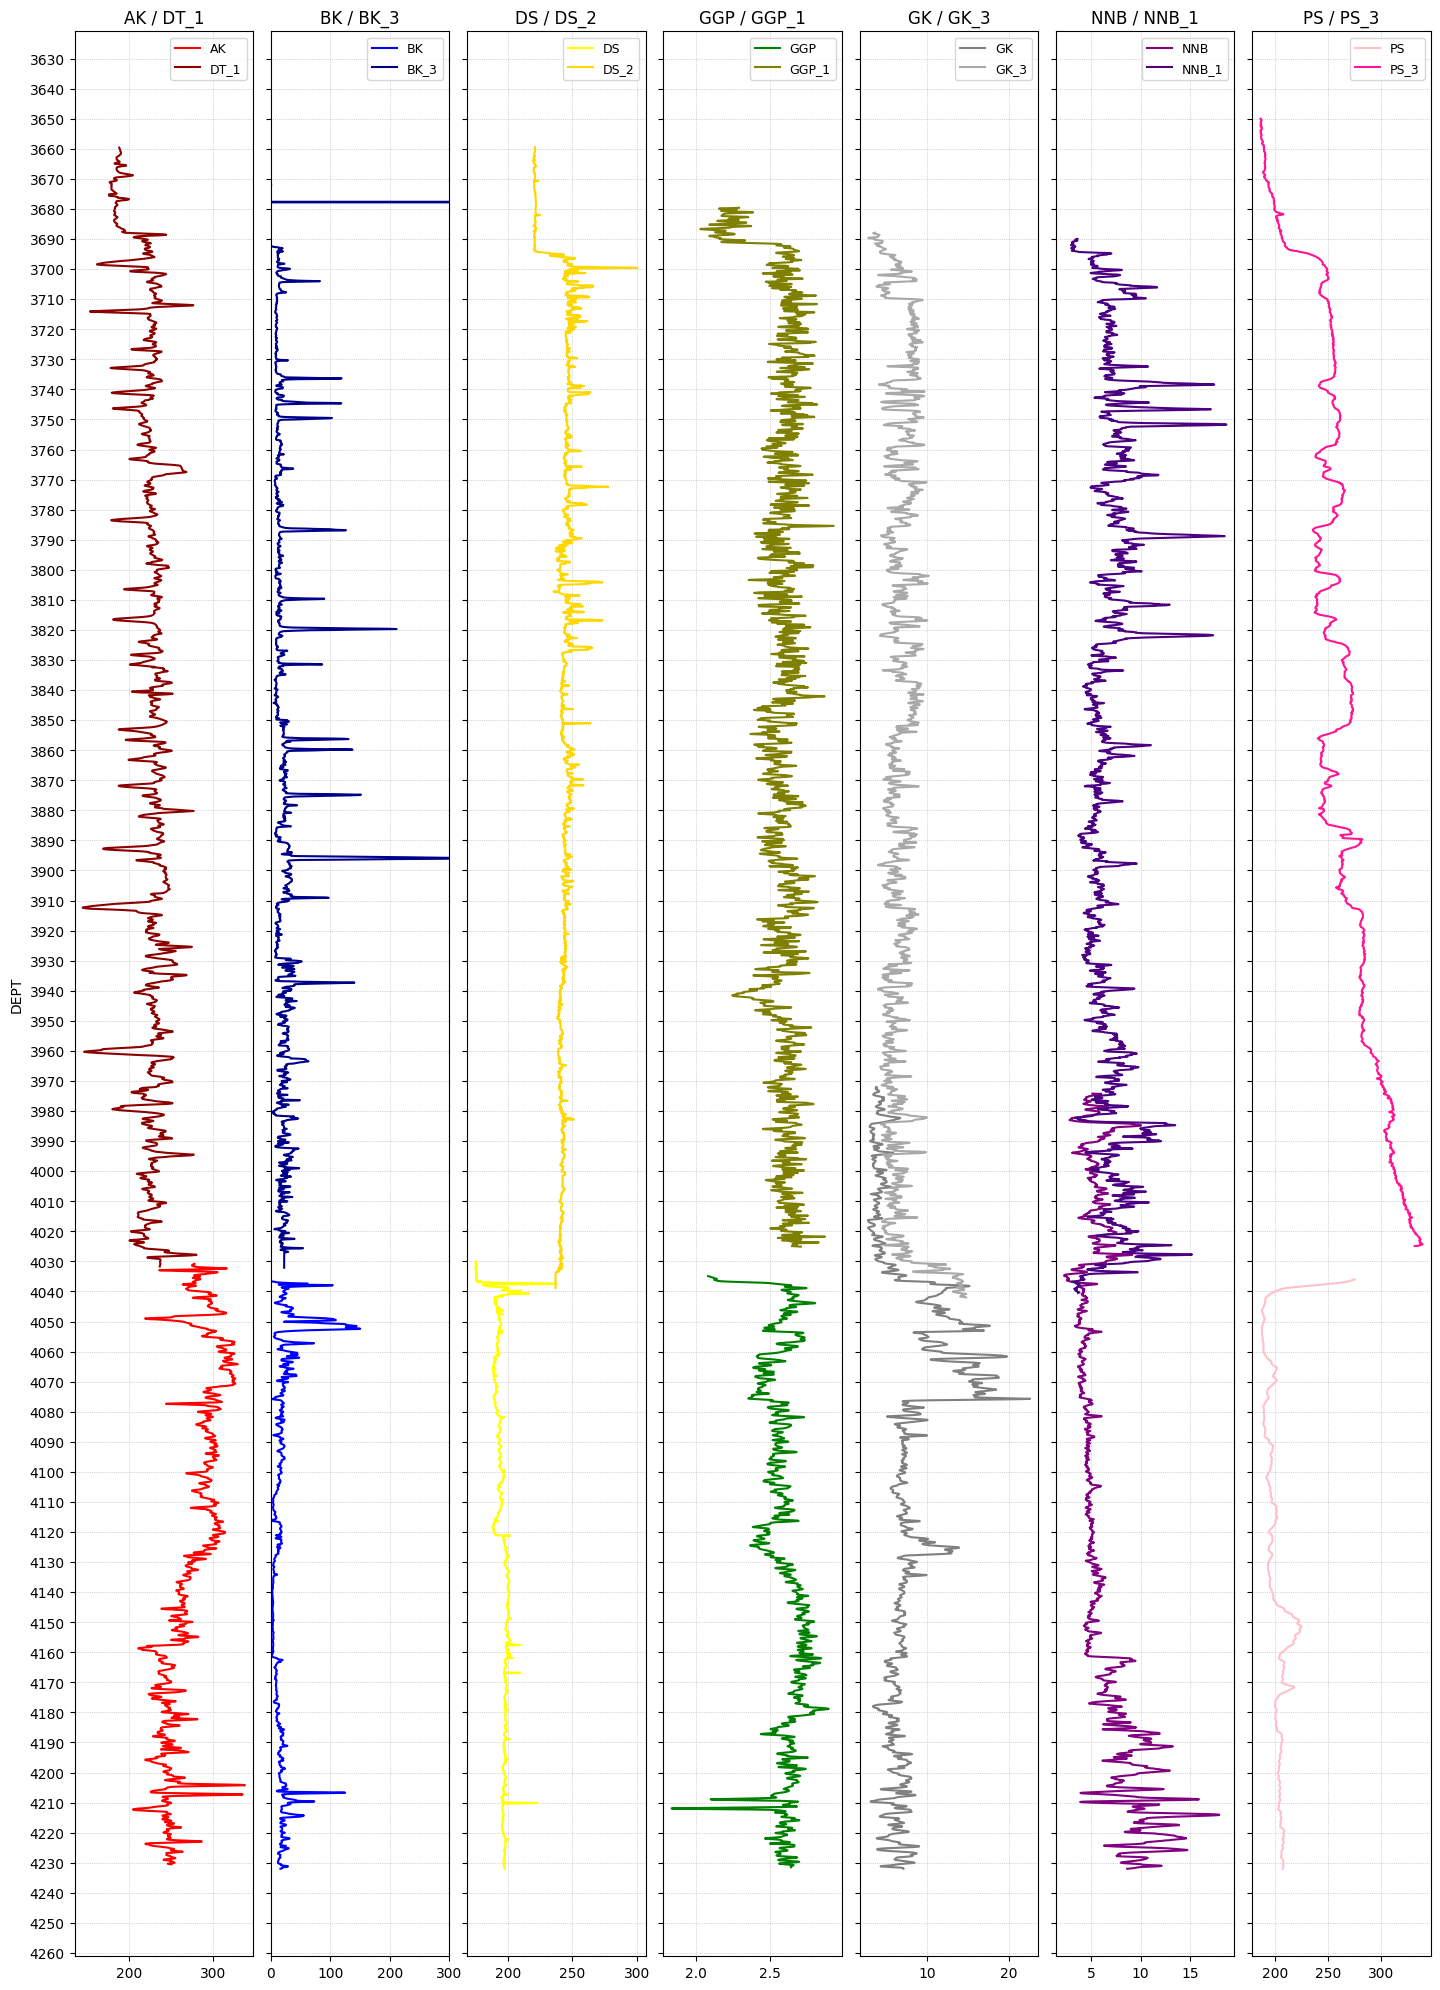

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=len(logs), figsize=(2.5 * len(logs), 25), sharey=True)

for i, (curve1, curve2, color1, color2) in enumerate(zip(logs, logs_, colors, colors_)):
    ax = axes[i]
    
    ax.plot(df[curve1], df['DEPT'], label=curve1, color=color1)
    ax.plot(df[curve2], df['DEPT'], label=curve2, color=color2)

    ax.set_title(f"{curve1} / {curve2}", fontsize=12)
    if i == 0:
        ax.set_ylabel('DEPT') 

    ax.invert_yaxis()

    ax.yaxis.set_major_locator(MultipleLocator(base=10))
    ax.grid(True, which='both', linestyle=':', linewidth=0.5)
    ax.legend(fontsize=9, loc='upper right')

    if curve1 == 'BK':
        ax.set_xlim(0, 300)

plt.subplots_adjust(wspace=0.1)
plt.show()



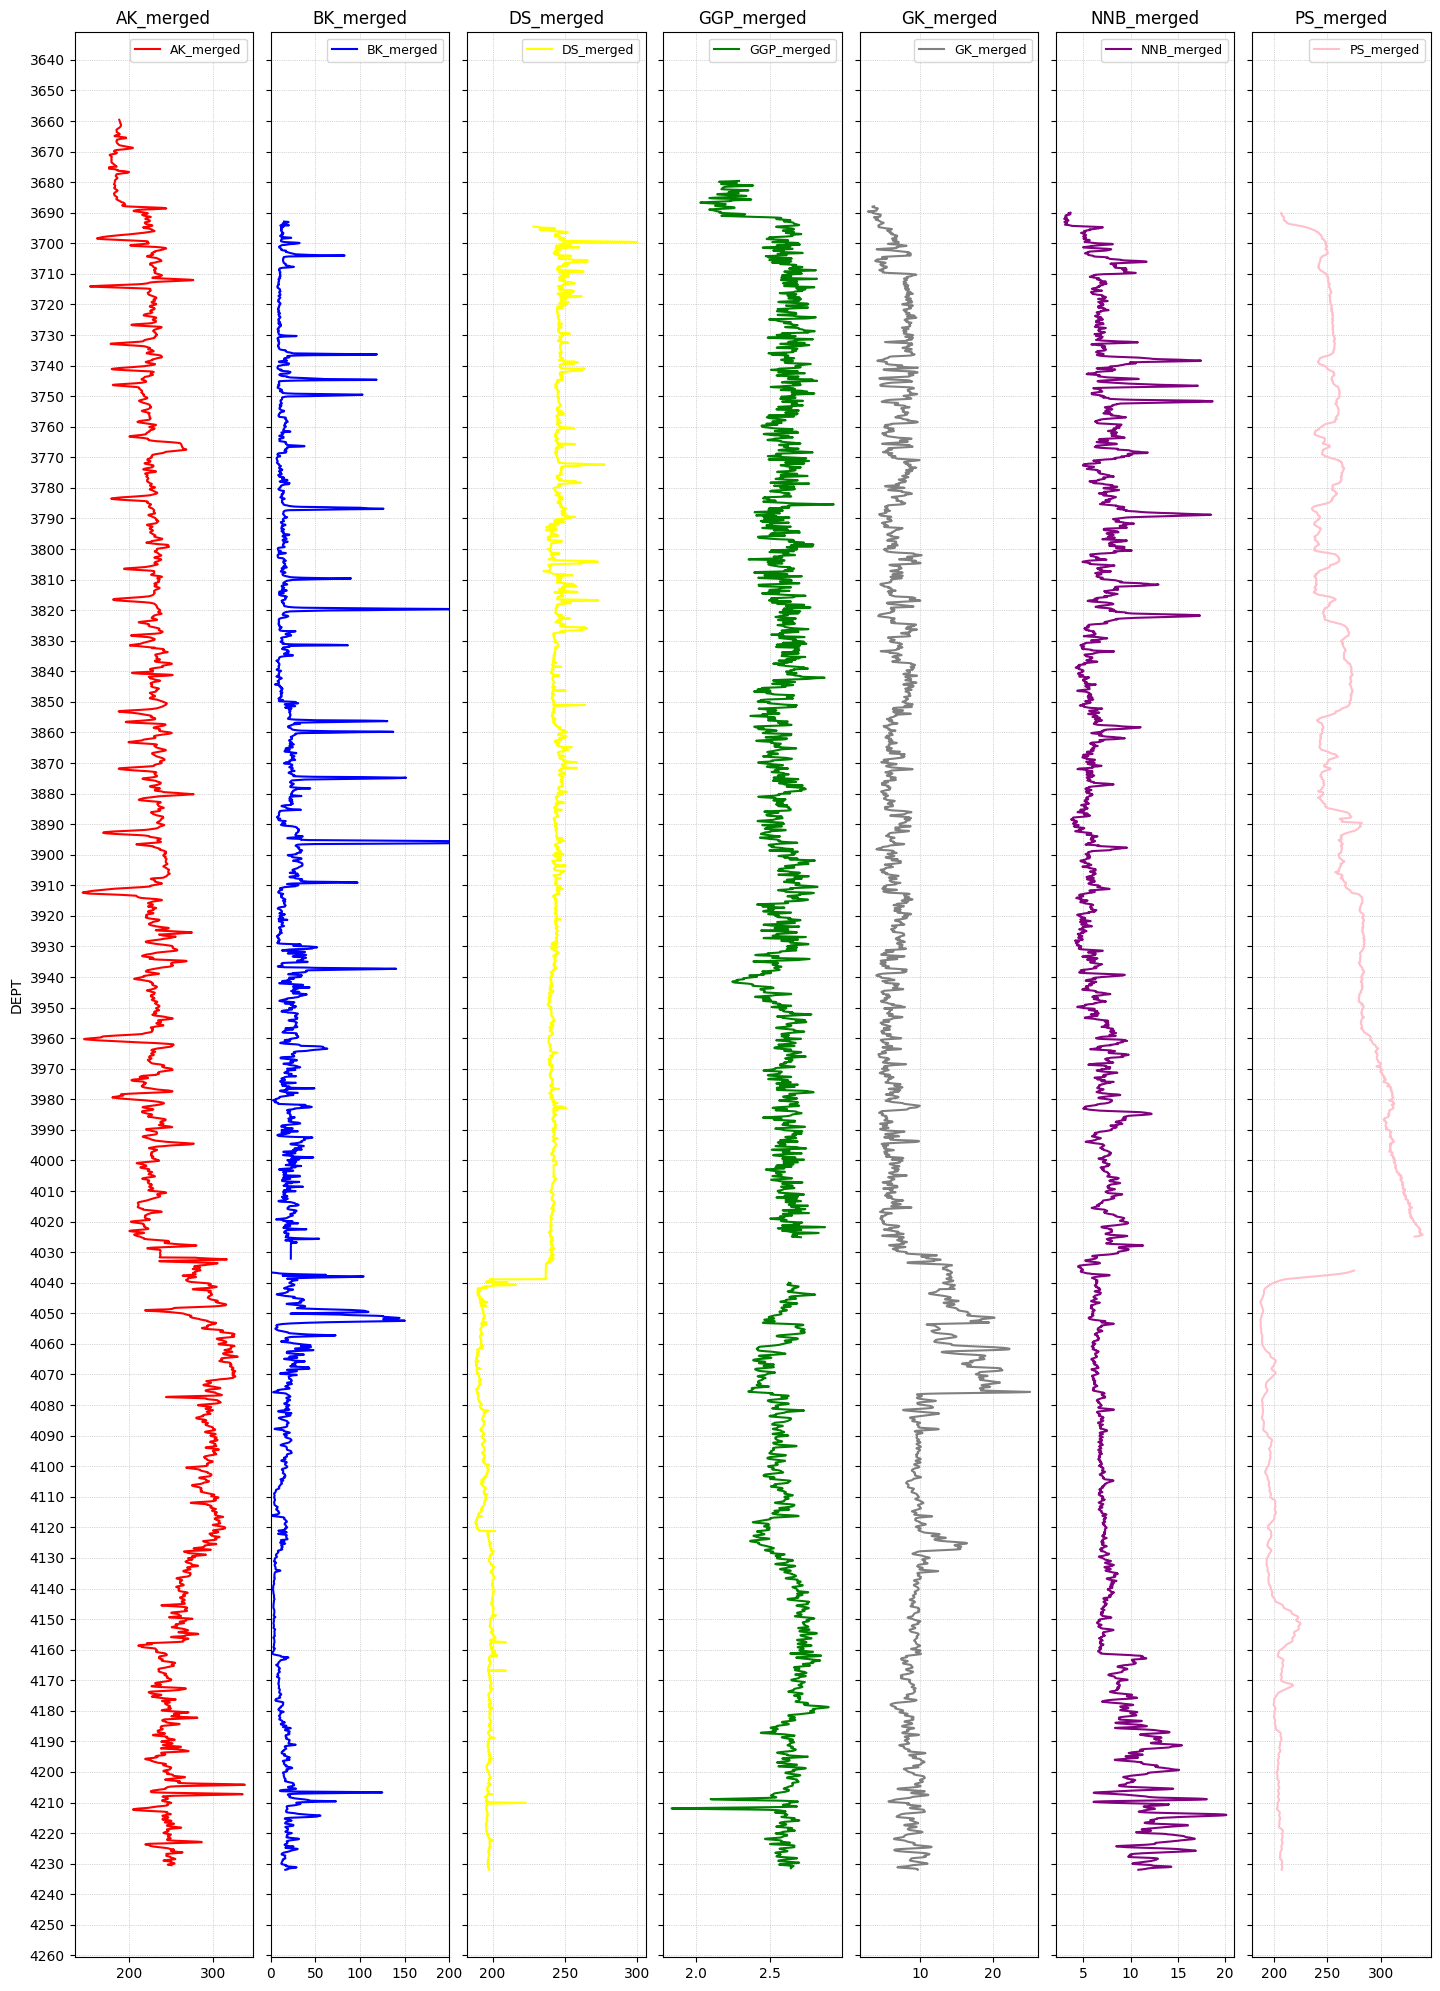

In [40]:
def cut_top(df, curve, meters=3):
    first_depth = df.loc[df[curve].notna(), "DEPT"].iloc[0]
    df.loc[df["DEPT"] <= first_depth + meters, curve] = pd.NA
cut_top(df, "BK_3", 40)
cut_top(df, "PS_3", 40)
cut_top(df, "DS_2", 35)
cut_top(df, "GGP", 5)

df['AK_merged'] = df['DT_1'].fillna(df['AK'])
df['BK_merged'] = df['BK_3'].fillna(df['BK'])
df['DS_merged'] = df['DS_2'].fillna(df['DS'])
df['GGP_merged'] = df['GGP_1'].fillna(df['GGP'])
df['PS_merged'] = df['PS_3'].fillna(df['PS'])

mask = df['GK'].notna() & df['GK_3'].notna()
df['GK'] -= (df.loc[mask,"GK"] - df.loc[mask,"GK_3"]).mean()
df['GK_merged'] = df['GK_3'].fillna(df['GK'])

mask = df['NNB'].notna() & df['NNB_1'].notna()
df['NNB'] -= (df.loc[mask,"NNB"] - df.loc[mask,"NNB_1"]).mean()
df['NNB_merged'] = df['NNB'].fillna(df['NNB_1'])


logs_new_name = ['AK_merged', 'BK_merged', 'DS_merged', 'GGP_merged', 'GK_merged', 'NNB_merged', 'PS_merged']

fig, axes = plt.subplots(nrows=1, ncols=len(logs_new_name), figsize=(2.5 * len(logs_new_name), 25), sharey=True)

for i, (curve1, color1) in enumerate(zip(logs_new_name, colors)):
    ax = axes[i]

    ax.plot(df[curve1], df['DEPT'], label=curve1, color=color1)
    
    ax.set_title(f"{curve1}", fontsize=12)
    if i == 0:
        ax.set_ylabel('DEPT') 
    ax.invert_yaxis()


    ax.yaxis.set_major_locator(MultipleLocator(base=10))
    ax.grid(True, which='both', linestyle=':', linewidth=0.5, )
    ax.legend(fontsize=9, loc='upper right')
    
    if curve1 == 'BK_merged':
        ax.set_xlim(0, 200)

plt.subplots_adjust(wspace=0.1)
plt.show()


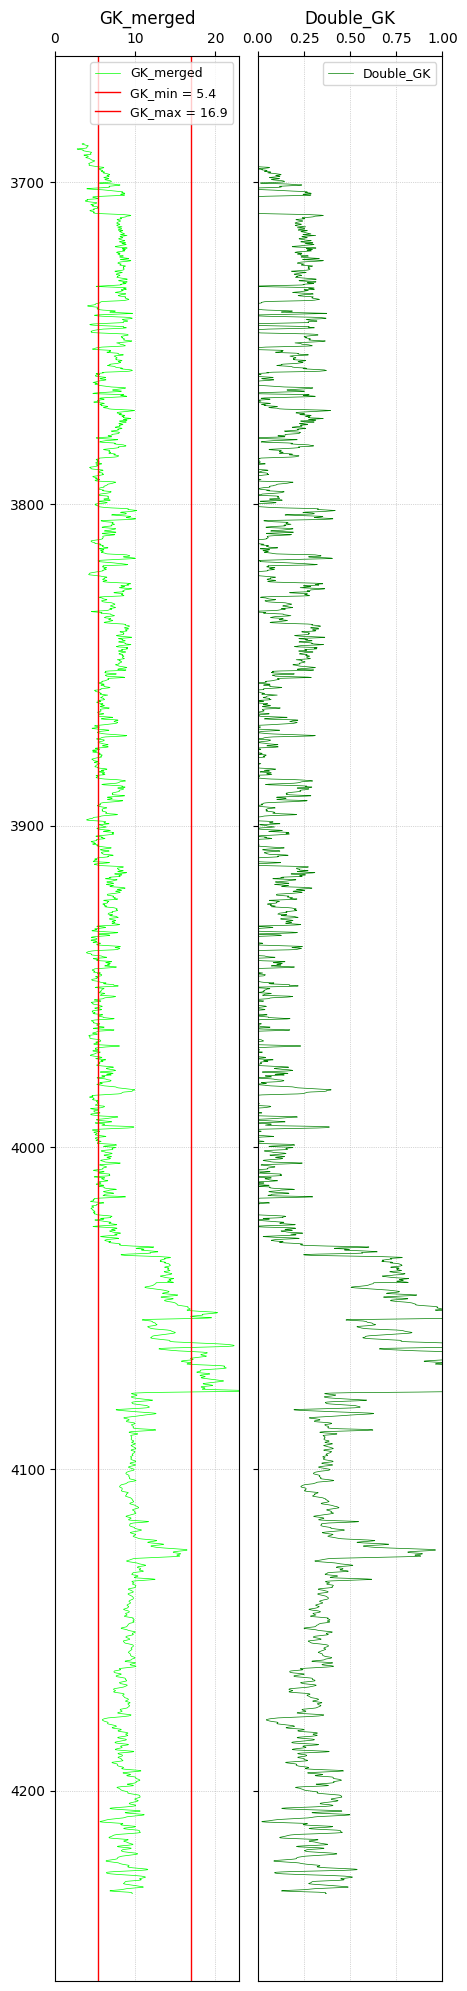

GK мин: 5.38
GK макс: 16.91
Значение ΔГК на глубине 4000 м: 0.18


In [41]:
zone_min = (3960, 3970)
zone_max = (4060, 4080)

mean_min = df.loc[(df["DEPT"] > zone_min[0]) & (df["DEPT"] < zone_min[1]), 'GK_merged'].mean()
mean_max = df.loc[(df["DEPT"] > zone_max[0]) & (df["DEPT"] < zone_max[1]), 'GK_merged'].mean()

df['Double_GK'] = (df['GK_merged'] - mean_min) / (mean_max - mean_min)
df.loc[df["Double_GK"] < 0, 'Double_GK'] = 0
df.loc[df["Double_GK"] > 1, 'Double_GK'] = 1

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 25), sharey=True)

axes[0].plot(df['GK_merged'], df['DEPT'], color='lime', lw=0.5, label='GK_merged')
axes[0].axvline(x=mean_min, color='r', lw=1, label=f'GK_min = {mean_min:.1f}')
axes[0].axvline(x=mean_max, color='r', lw=1, label=f'GK_max = {mean_max:.1f}')
axes[0].set_xlim(0, 23)
axes[0].set_title("GK_merged", fontsize=12)
axes[0].invert_yaxis()
axes[0].grid(True, which='both', linestyle=':', linewidth=0.5)
axes[0].legend(fontsize=9, loc='upper right')
axes[0].xaxis.set_ticks_position("top")
axes[0].xaxis.set_label_position("top")

axes[1].plot(df['Double_GK'], df['DEPT'], color='green', lw=0.5, label='Double_GK')
axes[1].set_xlim(0, 1)
axes[1].set_title("Double_GK", fontsize=12)
axes[1].grid(True, which='both', linestyle=':', linewidth=0.5)
axes[1].legend(fontsize=9, loc='upper right')
axes[1].xaxis.set_ticks_position("top")
axes[1].xaxis.set_label_position("top")

plt.subplots_adjust(wspace=0.1)
plt.show()

print(f"GK мин: {mean_min:.2f}")
print(f"GK макс: {mean_max:.2f}")
sample_depth = 4000
sample_value = df.loc[df["DEPT"] >= sample_depth, "Double_GK"].iloc[0]
print(f"Значение ΔГК на глубине {sample_depth} м: {sample_value:.2f}")
